<a href="https://colab.research.google.com/github/sameer0013/Data-science/blob/main/Unsupervised/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

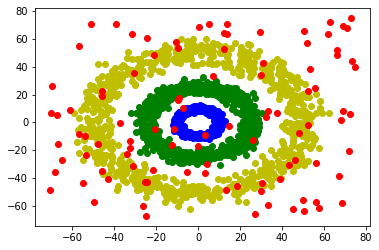

In [ ]:
def circle():
    X, y = make_circles(noise = 0.1, factor = 0.3, n_samples = 1500)
    X = X[ y==0]
    y = y[y==0]
    return X, y

X1, y1 = circle()
X2, y2 = circle()
X3, y3 = circle()
n1 = np.random.rand(100, 2)*150 - 75
# n2 = np.random.rand(100)*150 - 75

X1 *= 10
X2 *= 25
X3 *= 50

plt.scatter(X1[:, 0], X1[:, 1], color = 'b')
plt.scatter(X2[:, 0], X2[:, 1], color = 'g')
plt.scatter(X3[:, 0], X3[:, 1], color = 'y')
plt.scatter(n1[:, 0], n1[:, 1], color = 'r')

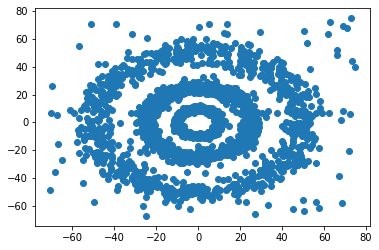

In [ ]:
X = np.vstack([X1, X2, X3, n1])
plt.scatter(X[:, 0], X[:, 1])

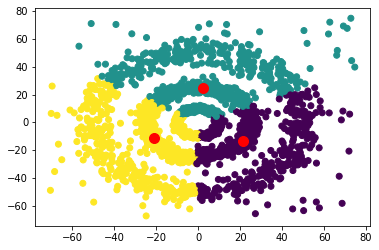

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit(X)
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = "red", s = 100)

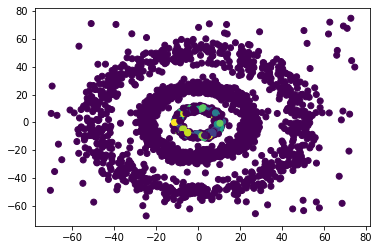

In [ ]:
from sklearn.cluster import DBSCAN
db =DBSCAN(eps=0.5,min_samples =5) # default parameter
y_pred = db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1],c=y_pred)



In [ ]:
y_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
np.unique(y_pred)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

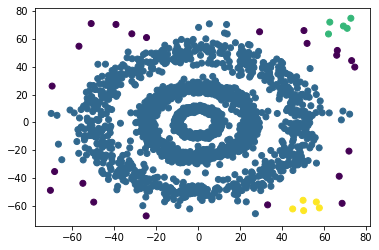

In [ ]:
db =DBSCAN(eps=10,min_samples =5) # default parameter
y_pred = db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1],c=y_pred)

In [ ]:
np.unique(y_pred)

array([-1,  0,  1,  2])

#find best eps

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
scaled = ss.fit_transform(X)


In [ ]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5)
nn.fit(scaled)

NearestNeighbors()

In [ ]:
distance,index = nn.kneighbors(scaled)

In [ ]:
distance

array([[0.        , 0.00160723, 0.00278033, 0.00640961, 0.00677638],
       [0.        , 0.00188396, 0.00288235, 0.0029033 , 0.00414784],
       [0.        , 0.00241132, 0.00332254, 0.00383295, 0.00451412],
       ...,
       [0.        , 0.00116906, 0.01010884, 0.01263887, 0.01314196],
       [0.        , 0.02771993, 0.03421034, 0.03742113, 0.04296081],
       [0.        , 0.01581821, 0.03278366, 0.03294425, 0.033501  ]])

In [ ]:
dis = distance[:,4]
dis.sort()

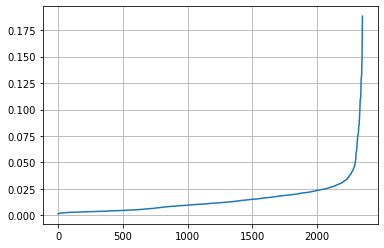

In [ ]:
plt.grid()
plt.plot(dis)

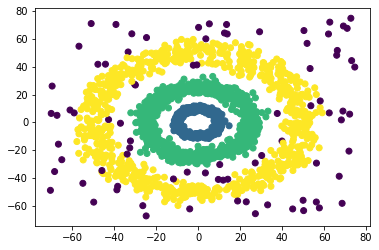

In [ ]:
db =DBSCAN(eps=0.03,min_samples =5) # default parameter
y_pred = db.fit_predict(scaled)
plt.scatter(X[:, 0], X[:, 1],c=y_pred)

In [ ]:
np.unique(y_pred)

array([-1,  0,  1,  2])

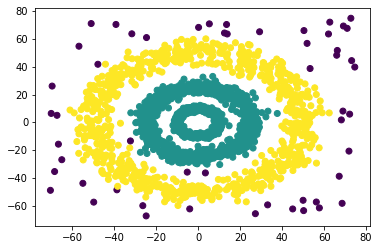

In [ ]:
db =DBSCAN(eps=0.04,min_samples =5) # default parameter
y_pred = db.fit_predict(scaled)
plt.scatter(X[:, 0], X[:, 1],c=y_pred)